In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'chao1.csv'
df_chao1 = pd.read_csv(file_path, sep=',')

# Load the metadata file
metadata = pd.read_csv('metadata_all.tsv', sep='\t')

# Merge the Chao1 data with the metadata
merged_df = pd.merge(df_chao1, metadata[['sample-id', 'Location']], on='sample-id', how='left')

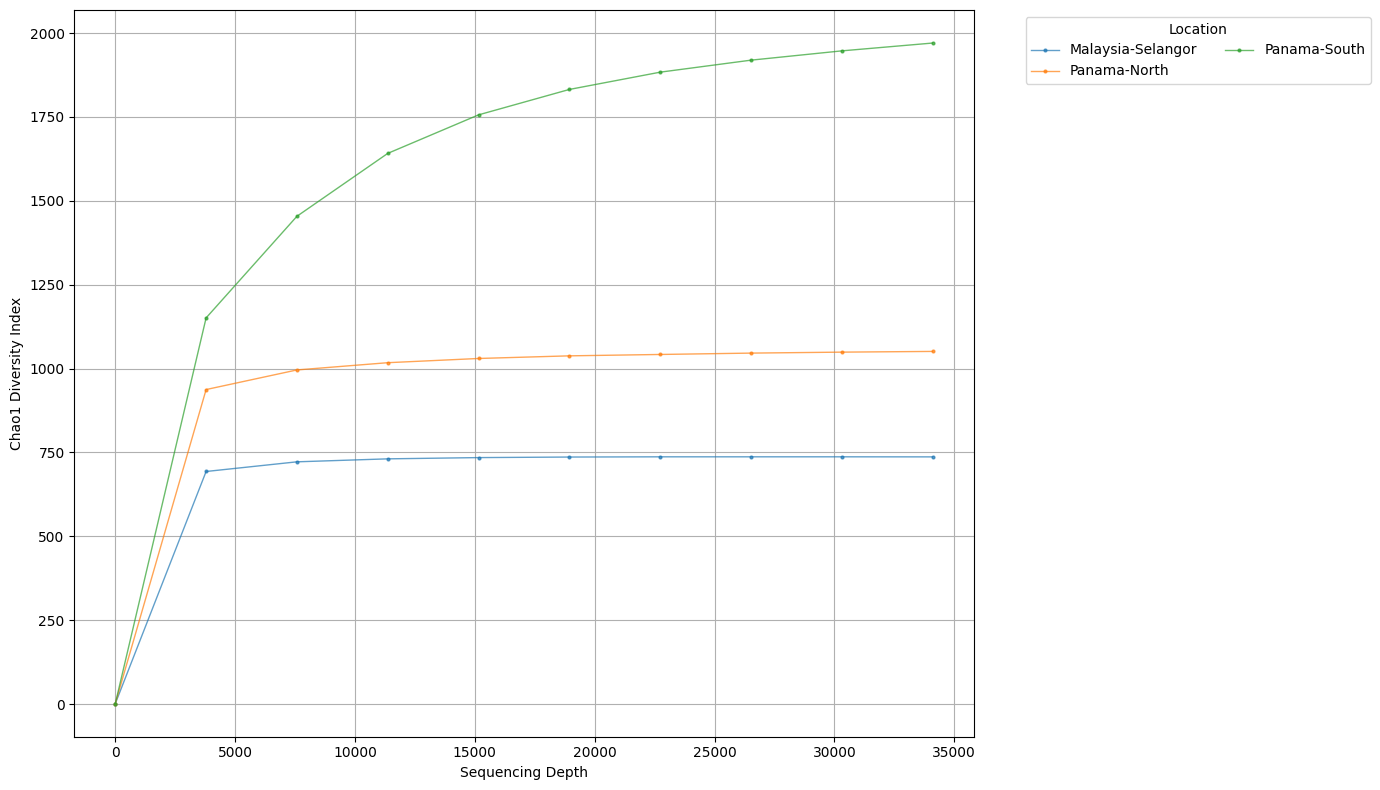

In [2]:
# Merge the Chao1 data with the metadata
merged_df = pd.merge(df_chao1, metadata[['sample-id', 'Location']], on='sample-id', how='left')

# Get columns related to depth from the merged DataFrame
depth_columns = [col for col in merged_df.columns if col.startswith('depth')]

# Melt the DataFrame to get depth and Chao1 diversity in separate columns
df_melted = merged_df.melt(id_vars=['sample-id', 'Location_x'], 
                           value_vars=depth_columns,
                           var_name='Depth', value_name='Chao1_Diversity')

# Getdepth as a numeric value for grouping and plotting
df_melted['Depth'] = df_melted['Depth'].str.replace('depth-', '').str.split('_').str[0].astype(int)

# Group by Location and Depth to calculate the average Chao1 Diversity
df_grouped = df_melted.groupby(['Location_x', 'Depth'], as_index=False)['Chao1_Diversity'].mean()

# Plotting
plt.figure(figsize=(14, 8))

# Plot each locations rarefaction curve
for location in df_grouped['Location_x'].unique():
    location_data = df_grouped[df_grouped['Location_x'] == location]
    plt.plot(location_data['Depth'], location_data['Chao1_Diversity'], 
             marker='o', markersize=2, linewidth=1, label=location, alpha=0.7)

# Customize the plot
plt.xlabel('Sequencing Depth')
plt.ylabel('Chao1 Diversity Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, title='Location')

plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

df_chao1['mean_chao1'] = df_chao1[depth_columns].mean(axis=1)

<Figure size 1000x800 with 0 Axes>

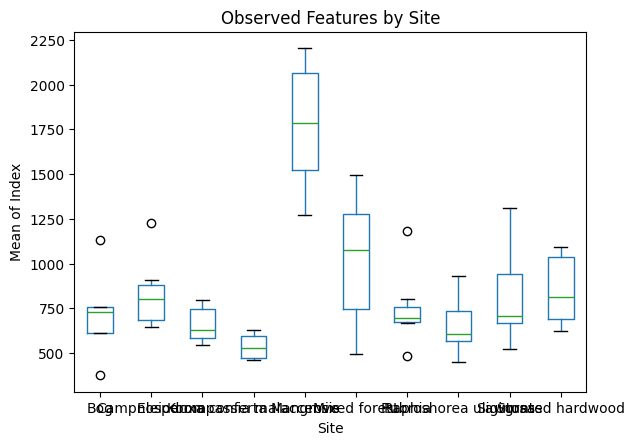

In [3]:
## Observed features plotting

file_path = 'observed_features.csv'
df_of = pd.read_csv(file_path, sep=',')

# Calculate the mean of for each sample
depth_columns = [col for col in df_of.columns if col.startswith('depth')]
df_of['mean_of'] = df_of[depth_columns].mean(axis=1)

# Merge of data with metadata
merged_df = pd.merge(df_of[['sample-id', 'mean_of']], metadata[['sample-id', 'Phasic_community']], on='sample-id')

# Create the boxplot
plt.figure(figsize=(10, 8))
merged_df.boxplot(column='mean_of', by='Phasic_community', grid=False)

# Customize the plot
plt.title('Observed Features by Site')
plt.suptitle('')  # Remove the automatic title to clean up the plot
plt.xlabel('Site')
plt.ylabel('Mean of Index')

# Show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

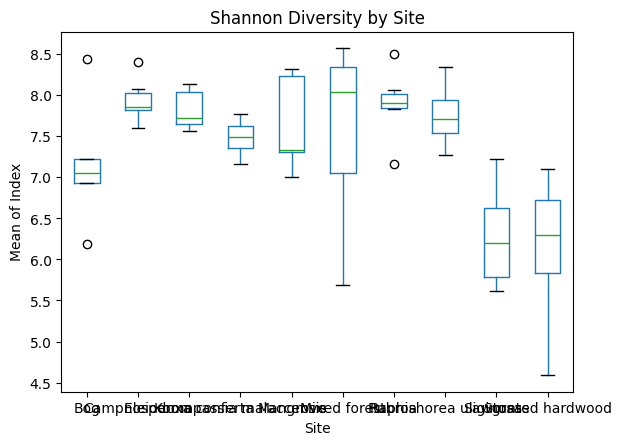

In [4]:
## Shannon Diversity plotting

file_path = 'shannon.csv'
df_shannon = pd.read_csv(file_path, sep=',')

# Calculate the mean Shannon for each sample
depth_columns = [col for col in df_shannon.columns if col.startswith('depth')]
df_shannon['mean_shannon'] = df_shannon[depth_columns].mean(axis=1)

# Merge shannon data with metadata
merged_df = pd.merge(df_shannon[['sample-id', 'mean_shannon']], metadata[['sample-id', 'Phasic_community']], on='sample-id')

# Create the boxplot
plt.figure(figsize=(10, 8))
merged_df.boxplot(column='mean_shannon', by='Phasic_community', grid=False)

# Customize the plot
plt.title('Shannon Diversity by Site')
plt.suptitle('')  # Remove the automatic title to clean up the plot
plt.xlabel('Site')
plt.ylabel('Mean of Index')

# Show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

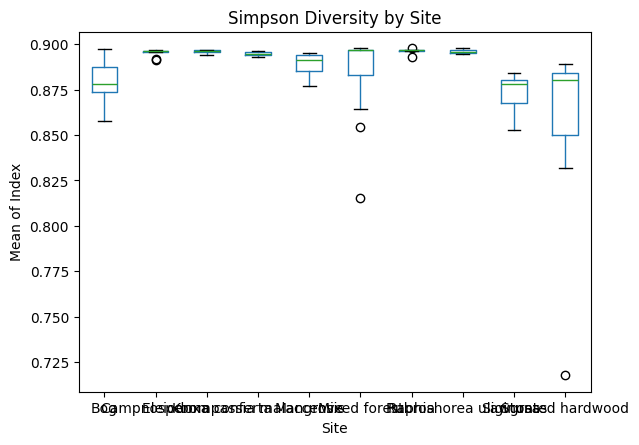

In [5]:
## simpson Diversity plotting

file_path = 'simpson.csv'
df_simpson = pd.read_csv(file_path, sep=',')

# Calculate the mean simpson for each sample
depth_columns = [col for col in df_simpson.columns if col.startswith('depth')]
df_simpson['mean_simpson'] = df_simpson[depth_columns].mean(axis=1)

# Merge simpson data with metadata
merged_df = pd.merge(df_simpson[['sample-id', 'mean_simpson']], metadata[['sample-id', 'Phasic_community']], on='sample-id')

# Create the boxplot
plt.figure(figsize=(10, 8))
merged_df.boxplot(column='mean_simpson', by='Phasic_community', grid=False)

# Customize the plot
plt.title('Simpson Diversity by Site')
plt.suptitle('')
plt.xlabel('Site')
plt.ylabel('Mean of Index')

# Show the plot
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Merging dataframes

# Merge each metric with the metadata
merged_simpson = pd.merge(df_simpson[['sample-id', 'mean_simpson']], metadata[['sample-id', 'Phasic_community']], on='sample-id')
merged_shannon = pd.merge(df_shannon[['sample-id', 'mean_shannon']], metadata[['sample-id', 'Phasic_community']], on='sample-id')
merged_of = pd.merge(df_of[['sample-id', 'mean_of']], metadata[['sample-id', 'Phasic_community']], on='sample-id')
merged_chao1 = pd.merge(df_chao1[['sample-id', 'mean_chao1']], metadata[['sample-id', 'Phasic_community']], on='sample-id')

# Combine all merged dataframes into a single dataframe
combined_df = pd.DataFrame({
    'sample-id': merged_simpson['sample-id'],
    'Phasic_community': merged_simpson['Phasic_community'],
    'Simpson': merged_simpson['mean_simpson'],
    'Shannon': merged_shannon['mean_shannon'],
    'Observed_Features': merged_of['mean_of'],
    'Chao1': merged_chao1['mean_chao1']
})


In [7]:
combined_df.to_csv('combined_data.csv', index=False)  
## Then used this to create boxplots in R

In [8]:
import pandas as pd

# Load the file contents
weighted_u = 'bray-curtis.txt'

# Read file into a list of lines
with open(weighted_u, 'r') as f:
    lines = f.readlines()

# Split the sections based on header keywords
eigvals = []
proportion = []
coords = []

section = None
for line in lines:
    if line.startswith('Eigvals'):
        section = 'eigvals'
        continue
    elif line.startswith('Proportion explained'):
        section = 'proportion'
        continue
    elif line.startswith('Site'):
        section = 'coords'
        continue

    if section == 'eigvals':
        eigvals.append(line.strip())
    elif section == 'proportion':
        proportion.append(line.strip())
    elif section == 'coords':
        coords.append(line.strip())

# Convert the eigvals and proportion sections to lists of floats
eigvals = list(map(float, eigvals[0].split()))
proportion_explained = list(map(float, proportion[0].split()))

# Convert the coords section to a DataFrame
coords_df = pd.DataFrame(
    [x.split('\t')[1:] for x in coords[1:]],
    columns=[f'PC{i+1}' for i in range(len(coords[0].split('\t'))-1)],
    index=[x.split('\t')[0] for x in coords[1:]]
)

# Convert values to floats
coords_df = coords_df.astype(float)

# Display the DataFrame and eigenvalues
print(coords_df.head())
print(f"Eigenvalues: {eigvals}")
print(f"Proportion explained: {proportion_explained}")


            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
st1_2  0.167619 -0.041446 -0.379569 -0.004779 -0.153960 -0.038900  0.021707   
st1_3  0.205373 -0.046401 -0.483973 -0.025871 -0.232207 -0.072373 -0.024381   
st1_4  0.217415 -0.050040 -0.546891 -0.038890 -0.277875 -0.090675 -0.074626   
st1_5  0.216370 -0.049342 -0.519859 -0.043571 -0.259471 -0.083711 -0.083616   
st1_6  0.191035 -0.046120 -0.490044 -0.027297 -0.241060 -0.075320 -0.064214   

            PC8       PC9      PC10  ...      PC83      PC84      PC85  \
st1_2 -0.004586  0.000516  0.025683  ...  0.021694 -0.011473  0.007915   
st1_3 -0.024231  0.038393  0.007261  ... -0.003383  0.002702 -0.000818   
st1_4 -0.039146  0.066147 -0.016402  ...  0.090363 -0.050556  0.029999   
st1_5 -0.039006  0.065642 -0.021579  ... -0.079001  0.044482 -0.026751   
st1_6 -0.036919  0.067313 -0.013192  ...  0.003925 -0.001882  0.000923   

           PC86      PC87      PC88      PC89      PC90      PC91      PC92  
st

In [9]:
# Remove the bottom three rows
coords_df = coords_df.iloc[:-3]

# Load metadata
metadata_df = pd.read_csv('metadata_all.tsv', sep='\t', index_col=0)

# Merge the PCoA results with metadata
merged_bray_c = pd.concat([coords_df, metadata_df], axis=1)

print(merged_bray_c.head())

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
st1_2  0.167619 -0.041446 -0.379569 -0.004779 -0.153960 -0.038900  0.021707   
st1_3  0.205373 -0.046401 -0.483973 -0.025871 -0.232207 -0.072373 -0.024381   
st1_4  0.217415 -0.050040 -0.546891 -0.038890 -0.277875 -0.090675 -0.074626   
st1_5  0.216370 -0.049342 -0.519859 -0.043571 -0.259471 -0.083711 -0.083616   
st1_6  0.191035 -0.046120 -0.490044 -0.027297 -0.241060 -0.075320 -0.064214   

            PC8       PC9      PC10  ...  Depth_cm  Depth_group_cm  \
st1_2 -0.004586  0.000516  0.025683  ...      16.0         0_to_30   
st1_3 -0.024231  0.038393  0.007261  ...      41.0       30_to_100   
st1_4 -0.039146  0.066147 -0.016402  ...     113.0      100_to_200   
st1_5 -0.039006  0.065642 -0.021579  ...     136.0      100_to_200   
st1_6 -0.036919  0.067313 -0.013192  ...     181.0      100_to_200   

       Depth_layer    pH     Na      K  Sulfate  Nitrate  Phosphate  Remove  
st1_2     Acrotelm  7.06  

In [10]:
# Calculate variance explained for PC1 and PC2
pc1_variance_explained = proportion_explained[0] * 100
pc2_variance_explained = proportion_explained[1] * 100

print(f"PC1 explains {pc1_variance_explained:.2f}% of the variance")
print(f"PC2 explains {pc2_variance_explained:.2f}% of the variance")


PC1 explains 14.87% of the variance
PC2 explains 11.95% of the variance


In [11]:
import pandas as pd

# Load the file
weigh_u = 'weighted-uni.txt'

# Read file into a list of lines
with open(weigh_u, 'r') as f:
    lines = f.readlines()

# Split the sections based on header keywords
eigvals = []
proportion = []
coords = []

section = None
for line in lines:
    if line.startswith('Eigvals'):
        section = 'eigvals'
        continue
    elif line.startswith('Proportion explained'):
        section = 'proportion'
        continue
    elif line.startswith('Site'):
        section = 'coords'
        continue

    if section == 'eigvals':
        eigvals.append(line.strip())
    elif section == 'proportion':
        proportion.append(line.strip())
    elif section == 'coords':
        coords.append(line.strip())

# Convert the eigvals and proportion sections to lists of floats
eigvals = list(map(float, eigvals[0].split()))
proportion_explained = list(map(float, proportion[0].split()))

# Convert the coords section to a DataFrame
coords_df = pd.DataFrame(
    [x.split('\t')[1:] for x in coords[1:]],
    columns=[f'PC{i+1}' for i in range(len(coords[0].split('\t'))-1)],
    index=[x.split('\t')[0] for x in coords[1:]]
)

# Convert values to floats
coords_df = coords_df.astype(float)

# Display the DataFrame and eigenvalues
print(coords_df.head())
print(f"Eigenvalues: {eigvals}")
print(f"Proportion explained: {proportion_explained}")


            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
st1_2  0.033340 -0.349304 -0.093345  0.015003  0.099330  0.087196  0.019423   
st1_3 -0.038149 -0.407559 -0.015301  0.043706  0.016536  0.072639 -0.014948   
st1_4 -0.194695 -0.378931  0.002978  0.021010 -0.071473 -0.045459 -0.049508   
st1_5 -0.188714 -0.382549  0.007284  0.022093 -0.087796 -0.051690 -0.044133   
st1_6 -0.328892 -0.329684 -0.040414  0.015182 -0.118956 -0.093191  0.008312   

            PC8       PC9      PC10  ...  PC83  PC84  PC85  PC86  PC87  PC88  \
st1_2 -0.062712  0.067176  0.018440  ...   0.0   0.0   0.0   0.0   0.0   0.0   
st1_3 -0.000520  0.014566 -0.024469  ...   0.0   0.0   0.0   0.0   0.0   0.0   
st1_4  0.038887 -0.035331  0.019784  ...   0.0   0.0   0.0   0.0   0.0   0.0   
st1_5  0.047556 -0.045433  0.015530  ...   0.0   0.0   0.0   0.0   0.0   0.0   
st1_6  0.015655 -0.004103 -0.015275  ...   0.0   0.0   0.0   0.0   0.0   0.0   

       PC89  PC90  PC91  PC92  
st1_2   0.0 

C:\Users\rache\AppData\Local\Temp\ipykernel_40268\2893841647.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=depth_group)


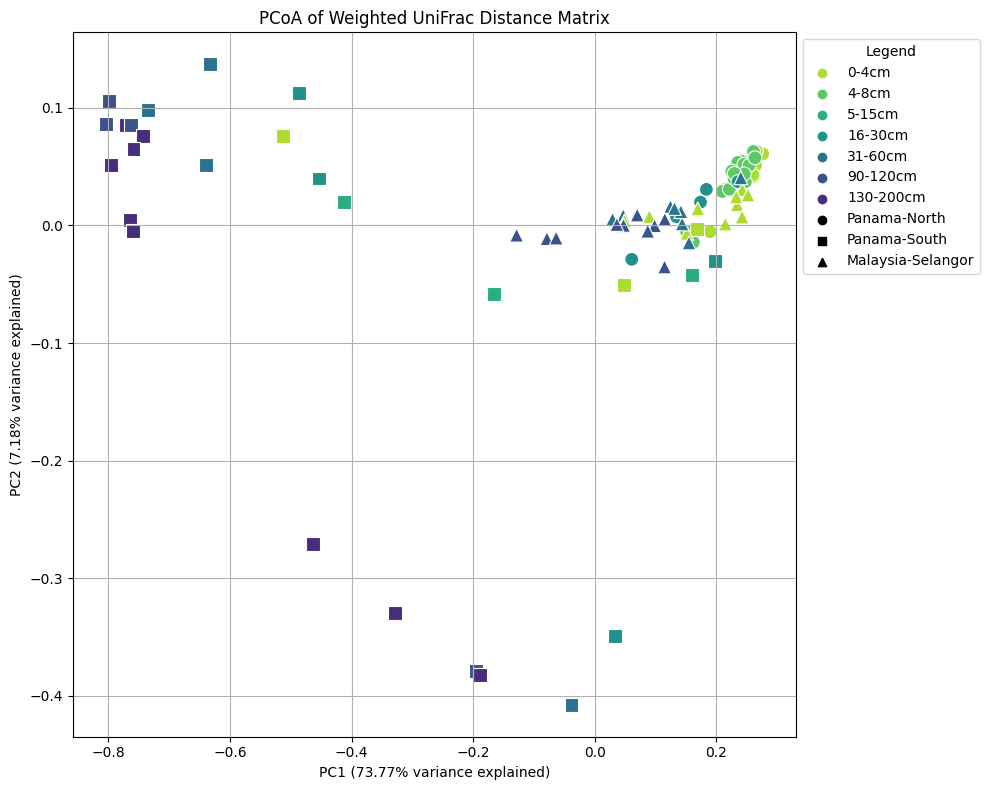

In [12]:

import seaborn as sns

metadata = pd.read_csv('metadata_all.tsv', sep='\t', index_col=0)

# Merge the metadata with the PCoA coordinates
merged_df = coords_df.merge(metadata[['Location', 'Depth_group_new']], left_index=True, right_index=True)

# Define marker styles for each location
marker_styles = {
    'Panama-North': 'o',
    'Panama-South': 's',
    'Malaysia-Selangor': '^'
}

# Define the order of depth groups and create a colour scale
depth_order = ['0-4cm', '4-8cm', '5-15cm', '16-30cm', '31-60cm', '90-120cm', '130-200cm']
palette = sns.color_palette("viridis", n_colors=len(depth_order))[::-1]

# Create the plot
plt.figure(figsize=(10, 8))

for location, marker in marker_styles.items():
    subset = merged_df[merged_df['Location'] == location]
    sns.scatterplot(
        x=subset['PC1'], y=subset['PC2'],
        hue=subset['Depth_group_new'],
        hue_order=depth_order,
        palette=palette,
        marker=marker,
        s=100,
        legend=False
    )

# Add a legend
for depth_group, color in zip(depth_order, palette):
    plt.scatter([], [], c=color, label=depth_group)
for location, marker in marker_styles.items():
    plt.scatter([], [], c='k', marker=marker, label=location)

plt.title('PCoA of Weighted UniFrac Distance Matrix')
plt.xlabel(f'PC1 ({proportion_explained[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({proportion_explained[1]:.2%} variance explained)')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Legend')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Load the file
weigh_u = 'unweighted-uni.txt'

# Read file into a list of lines
with open(weigh_u, 'r') as f:
    lines = f.readlines()

# Split the sections based on header keywords
eigvals = []
proportion = []
coords = []

section = None
for line in lines:
    if line.startswith('Eigvals'):
        section = 'eigvals'
        continue
    elif line.startswith('Proportion explained'):
        section = 'proportion'
        continue
    elif line.startswith('Site'):
        section = 'coords'
        continue

    if section == 'eigvals':
        eigvals.append(line.strip())
    elif section == 'proportion':
        proportion.append(line.strip())
    elif section == 'coords':
        coords.append(line.strip())

# Convert the eigvals and proportion sections to lists of floats
eigvals = list(map(float, eigvals[0].split()))
proportion_explained = list(map(float, proportion[0].split()))

# Convert the coords section to a DataFrame
coords_df = pd.DataFrame(
    [x.split('\t')[1:] for x in coords[1:]],
    columns=[f'PC{i+1}' for i in range(len(coords[0].split('\t'))-1)],
    index=[x.split('\t')[0] for x in coords[1:]]
)

# Convert values to floats
coords_df = coords_df.astype(float)

# Display the DataFrame and eigenvalues
print(coords_df.head())
print(f"Eigenvalues: {eigvals}")
print(f"Proportion explained: {proportion_explained}")


            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
st1_2 -0.404747 -0.338604 -0.190351  0.112540  0.058415  0.047049  0.001402   
st1_3 -0.430987 -0.358243 -0.195518  0.110132  0.066338  0.019977  0.011465   
st1_4 -0.459052 -0.363284 -0.198274  0.087000  0.074109 -0.020507  0.031135   
st1_5 -0.447855 -0.347588 -0.192866  0.076840  0.063681 -0.020657  0.028716   
st1_6 -0.456081 -0.308120 -0.163533  0.025089  0.060553 -0.046562  0.040324   

            PC8       PC9      PC10  ...      PC83      PC84      PC85  \
st1_2 -0.137174 -0.149361  0.182046  ... -0.003170 -0.003431 -0.001992   
st1_3 -0.099881 -0.111626  0.110652  ...  0.000377  0.004725  0.002330   
st1_4 -0.005415  0.021109 -0.095199  ... -0.001050 -0.000119  0.002547   
st1_5  0.019909  0.060911 -0.121708  ... -0.000380 -0.000622 -0.001965   
st1_6  0.071370  0.110230 -0.198652  ...  0.003557 -0.000793  0.003108   

           PC86      PC87      PC88      PC89      PC90      PC91      PC92  
st

C:\Users\rache\AppData\Local\Temp\ipykernel_40268\1200567482.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=depth_group)


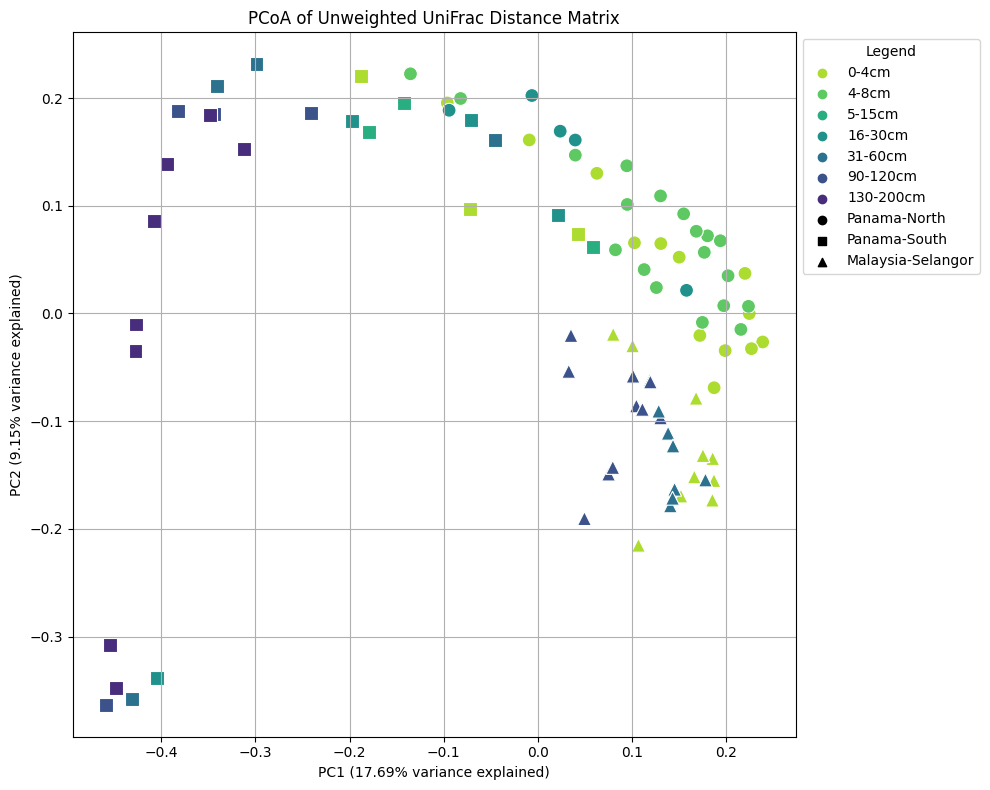

In [14]:
metadata = pd.read_csv('metadata_all.tsv', sep='\t', index_col=0)

# Merge the metadata with the PCoA coordinates
merged_df = coords_df.merge(metadata[['Location', 'Depth_group_new']], left_index=True, right_index=True)
merged_df_unweighted = coords_df.merge(metadata[['Location', 'Depth_group_new']], left_index=True, right_index=True)
# Define marker styles for each location
marker_styles = {
    'Panama-North': 'o',
    'Panama-South': 's',
    'Malaysia-Selangor': '^'
}

# Define the order of depth groups and create a colour scale
depth_order = ['0-4cm', '4-8cm', '5-15cm', '16-30cm', '31-60cm', '90-120cm', '130-200cm']
palette = sns.color_palette("viridis", n_colors=len(depth_order))[::-1]

# Create the plot
plt.figure(figsize=(10, 8))

for location, marker in marker_styles.items():
    subset = merged_df[merged_df['Location'] == location]
    sns.scatterplot(
        x=subset['PC1'], y=subset['PC2'],
        hue=subset['Depth_group_new'],
        hue_order=depth_order,
        palette=palette,
        marker=marker,
        s=100,
        legend=False
    )

# Add a combined legend
for depth_group, color in zip(depth_order, palette):
    plt.scatter([], [], c=color, label=depth_group)
for location, marker in marker_styles.items():
    plt.scatter([], [], c='k', marker=marker, label=location)

plt.title('PCoA of Unweighted UniFrac Distance Matrix')
plt.xlabel(f'PC1 ({proportion_explained[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({proportion_explained[1]:.2%} variance explained)')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Legend')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\rache\AppData\Local\Temp\ipykernel_40268\2441217455.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=depth_group)


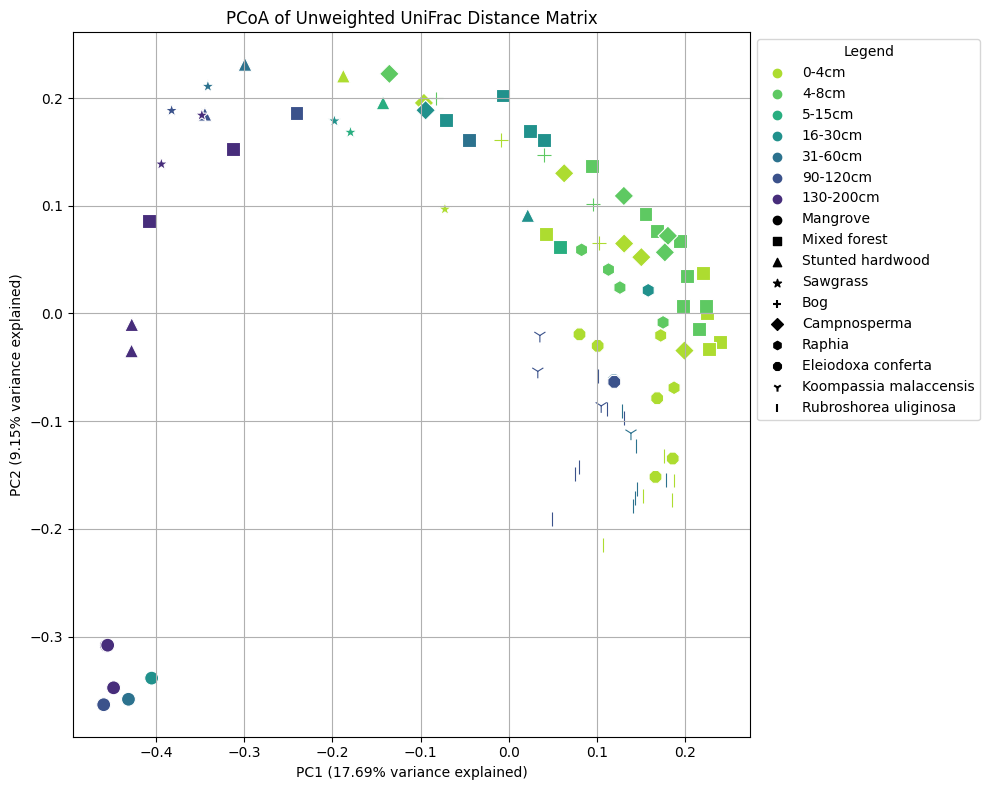

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metadata = pd.read_csv('metadata_all.tsv', sep='\t', index_col=0)

# Merge the metadata with the PCoA coordinates
merged_df = coords_df.merge(metadata[['Depth_group_new', 'Phasic_community']], left_index=True, right_index=True)

# Define marker styles for each location
marker_styles = {
    'Mangrove': 'o',
    'Mixed forest': 's',
    'Stunted hardwood': '^',
    'Sawgrass': '*',
    'Bog': '+',
    'Campnosperma': 'D',
    'Raphia': 'h',
    'Eleiodoxa conferta': '8',
    'Koompassia malaccensis': '1',
    'Rubroshorea uliginosa': '|'
}

# Define the order of depth groups and create a colour scale
depth_order = ['0-4cm', '4-8cm', '5-15cm', '16-30cm', '31-60cm', '90-120cm', '130-200cm']
palette = sns.color_palette("viridis", n_colors=len(depth_order))[::-1]

# Create the plot
plt.figure(figsize=(10, 8))

for location, marker in marker_styles.items():
    subset = merged_df[merged_df['Phasic_community'] == location]
    if not subset.empty:
        sns.scatterplot(
            x=subset['PC1'], y=subset['PC2'],
            hue=subset['Depth_group_new'],
            hue_order=depth_order,
            palette=palette,
            marker=marker,
            s=100,
            legend=False
        )

# Add a combined legend manually
for depth_group, color in zip(depth_order, palette):
    plt.scatter([], [], c=color, label=depth_group)
for location, marker in marker_styles.items():
    plt.scatter([], [], c='k', marker=marker, label=location)

plt.title('PCoA of Unweighted UniFrac Distance Matrix')
plt.xlabel(f'PC1 ({proportion_explained[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({proportion_explained[1]:.2%} variance explained)')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Legend')
plt.grid(True)
plt.tight_layout()
plt.show()

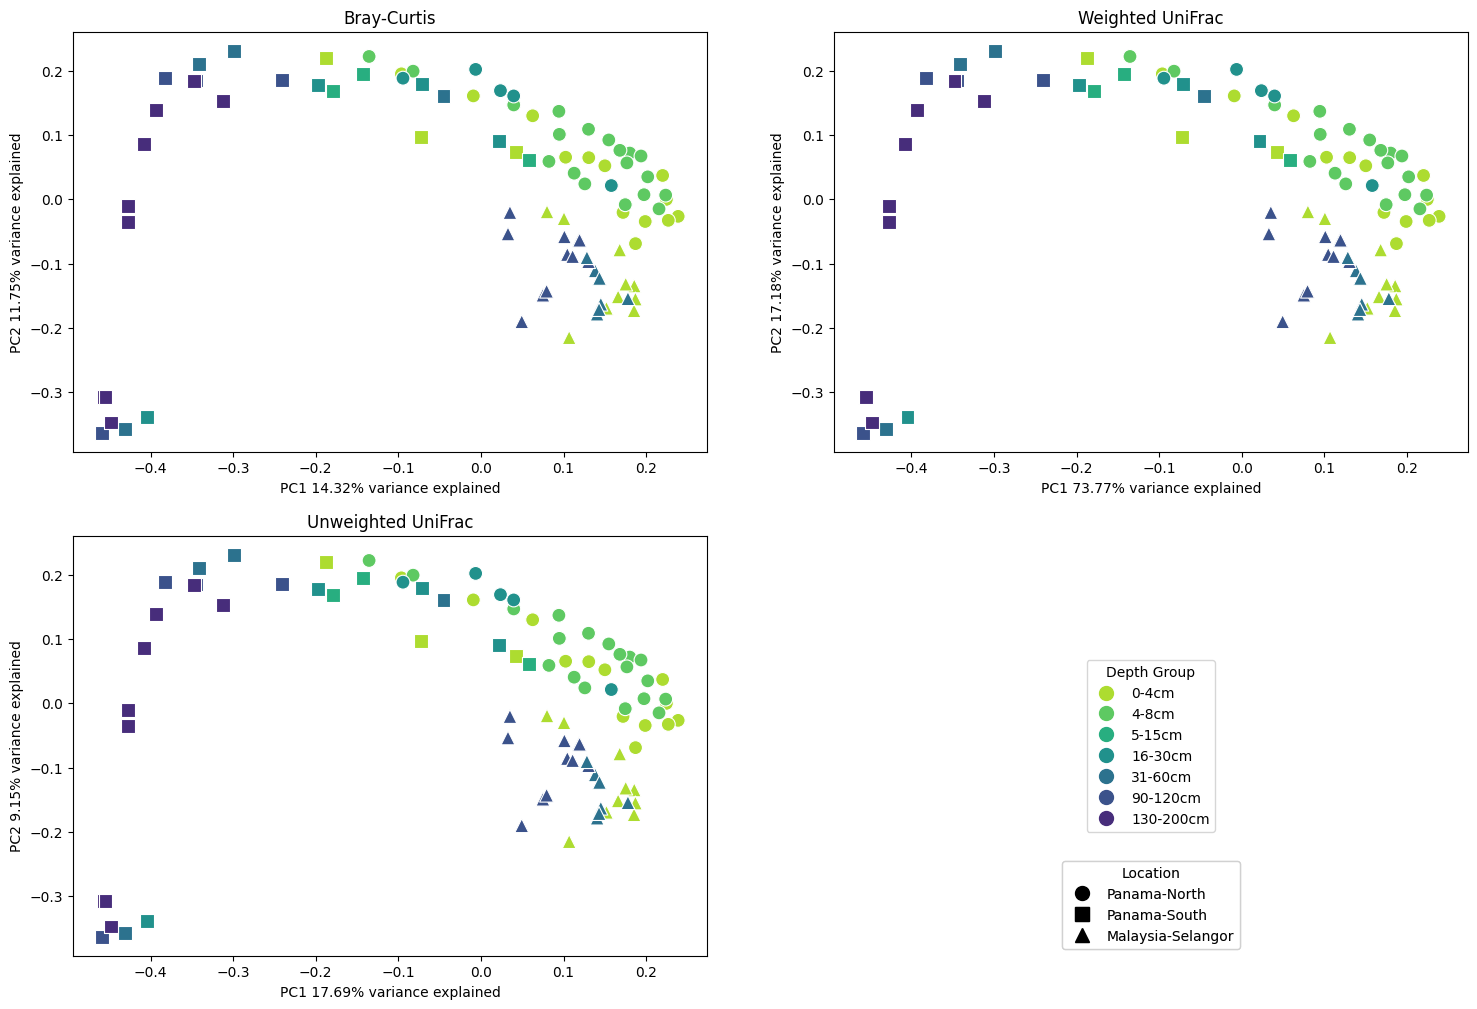

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the metadata with the PCoA coordinates
merged_df = coords_df.merge(metadata[['Depth_group_new', 'Location']], left_index=True, right_index=True)

# Define marker styles for each location
marker_styles = {
    'Panama-North': 'o',
    'Panama-South': 's',
    'Malaysia-Selangor': '^'
}

# Define the order of depth groups and create a colour scale
depth_order = ['0-4cm', '4-8cm', '5-15cm', '16-30cm', '31-60cm', '90-120cm', '130-200cm']
palette = sns.color_palette("viridis", n_colors=len(depth_order))[::-1]

# Make a grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1 - Bray-Curtis
for location, marker in marker_styles.items():
    subset = merged_df[merged_df['Location'] == location]
    sns.scatterplot(
        ax=axes[0, 0], x=subset['PC1'], y=subset['PC2'],
        hue=subset['Depth_group_new'], hue_order=depth_order,
        palette=palette, marker=marker, s=100, legend=False
    )
axes[0, 0].set_title('Bray-Curtis')
axes[0, 0].set_xlabel('PC1 14.32% variance explained')
axes[0, 0].set_ylabel('PC2 11.75% variance explained')

# Plot 2 Weighted UniFrac
for location, marker in marker_styles.items():
    subset = merged_df[merged_df['Location'] == location]
    sns.scatterplot(
        ax=axes[0, 1], x=subset['PC1'], y=subset['PC2'],
        hue=subset['Depth_group_new'], hue_order=depth_order,
        palette=palette, marker=marker, s=100, legend=False
    )
axes[0, 1].set_title('Weighted UniFrac')
axes[0, 1].set_xlabel('PC1 73.77% variance explained')
axes[0, 1].set_ylabel('PC2 17.18% variance explained')

# Plot 3 Unweighted UniFrac 
for location, marker in marker_styles.items():
    subset = merged_df_unweighted[merged_df_unweighted['Location'] == location]
    sns.scatterplot(
        ax=axes[1, 0], x=subset['PC1'], y=subset['PC2'],
        hue=subset['Depth_group_new'], hue_order=depth_order,
        palette=palette, marker=marker, s=100, legend=False
    )
axes[1, 0].set_title('Unweighted UniFrac')
axes[1, 0].set_xlabel('PC1 17.69% variance explained')
axes[1, 0].set_ylabel('PC2 9.15% variance explained')


axes[1, 1].axis('off')

# Create the combined legend
handles_depth = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None') for color in palette]
handles_location = [plt.Line2D([0], [0], marker=marker, color='k', markersize=10, linestyle='None') for marker in marker_styles.values()]

# Legend for Depth Groups
legend_depth = axes[1, 1].legend(handles_depth, depth_order, title="Depth Group", loc='center')

# Legend for Locations
legend_location = axes[1, 1].legend(handles_location, marker_styles.keys(), title="Location", loc='lower center')

# Add legends
axes[1, 1].add_artist(legend_depth)
axes[1, 1].add_artist(legend_location)



In [17]:
import pandas as pd
### Getting average relative abundances


# Import the file
feature_table = pd.read_csv('collapsed_table_frequency_L3.tsv', sep='\t')



In [18]:
# Set taxonomy Ids as the index
feature_table.set_index('#OTU ID', inplace=True)

# Verify  headers
# feature_table.head()


In [19]:
 #Calculate the mean abundance for each taxon across all samples
feature_table['mean_abundance'] = feature_table.mean(axis=1)

# Sort the taxa by mean abundance and get the top 10
top_10 = feature_table.sort_values(by='mean_abundance', ascending=False).head(10)

# Get bacteria and archaea
is_bacteria = feature_table.index.str.contains('d__Bacteria')
is_archaea = feature_table.index.str.contains('d__Archaea')

# Sumup the other taxa  and rename
bacteria_other = feature_table[is_bacteria & ~feature_table.index.isin(top_10.index)].drop(columns='mean_abundance').sum()
archaea_other = feature_table[is_archaea & ~feature_table.index.isin(top_10.index)].drop(columns='mean_abundance').sum()

bacteria_other.name = 'Bacteria-other'
archaea_other.name = 'Archaea-other'
final_table = pd.concat([top_10.drop(columns='mean_abundance'), pd.DataFrame([bacteria_other, archaea_other])])


print(final_table)


                                                       st1_1     st1_2  \
d__Bacteria;p__Acidobacteriota;c__Acidobacteriae    0.000483  0.000775   
d__Archaea;p__Crenarchaeota;c__Bathyarchaeia        0.034170  0.041449   
d__Bacteria;p__Proteobacteria;c__Alphaproteobac...  0.031258  0.017357   
d__Bacteria;p__Proteobacteria;c__Gammaproteobac...  0.286274  0.034240   
d__Bacteria;p__Verrucomicrobiota;c__Verrucomicr...  0.000704  0.000790   
d__Archaea;p__Crenarchaeota;c__Nitrososphaeria      0.000317  0.000221   
d__Bacteria;p__Planctomycetota;c__Planctomycetes    0.004223  0.004980   
d__Bacteria;p__Actinobacteriota;c__Actinobacteria   0.014918  0.007872   
d__Bacteria;p__Planctomycetota;c__Phycisphaerae     0.003298  0.002924   
d__Bacteria;p__Chloroflexi;c__Dehalococcoidia       0.052662  0.074092   
Bacteria-other                                      0.523074  0.762325   
Archaea-other                                       0.048619  0.052973   

                                     

In [20]:
# function to simplify names
def simplify_taxa_name(taxa_string):
    # Split the taxonomy string by ';'
    taxa_parts = taxa_string.split(';')
    
    # remove the phylum (p__) and class (c__)
    phylum = [part for part in taxa_parts if 'p__' in part]
    class_ = [part for part in taxa_parts if 'c__' in part]
    
    # Combine them
    if phylum and class_:
        return f"{phylum[0][3:]}-{class_[0][3:]}"
    else:
        return taxa_string

# Apply function to index
final_table.index = final_table.index.map(simplify_taxa_name)

print(final_table)

                                       st1_1     st1_2     st1_3     st1_4  \
Acidobacteriota-Acidobacteriae      0.000483  0.000775  0.001058  0.007719   
Crenarchaeota-Bathyarchaeia         0.034170  0.041449  0.086077  0.223773   
Proteobacteria-Alphaproteobacteria  0.031258  0.017357  0.009069  0.003653   
Proteobacteria-Gammaproteobacteria  0.286274  0.034240  0.010550  0.042182   
Verrucomicrobiota-Verrucomicrobiae  0.000704  0.000790  0.000522  0.001866   
Crenarchaeota-Nitrososphaeria       0.000317  0.000221  0.000677  0.003120   
Planctomycetota-Planctomycetes      0.004223  0.004980  0.007235  0.004906   
Actinobacteriota-Actinobacteria     0.014918  0.007872  0.003413  0.001147   
Planctomycetota-Phycisphaerae       0.003298  0.002924  0.004457  0.014038   
Chloroflexi-Dehalococcoidia         0.052662  0.074092  0.164537  0.183831   
Bacteria-other                      0.523074  0.762325  0.642224  0.478263   
Archaea-other                       0.048619  0.052973  0.070181

In [21]:
# Load the metadata file
metadata = pd.read_csv('metadata_all.tsv', sep='\t')

#transpose final table so can be merged with metadata
final_table = final_table.T

# Merge the new table with the metadata
merged_data = final_table.merge(metadata, left_index=True, right_index=True)

merged_data

,Acidobacteriota-Acidobacteriae,Crenarchaeota-Bathyarchaeia,Proteobacteria-Alphaproteobacteria,Proteobacteria-Gammaproteobacteria,Verrucomicrobiota-Verrucomicrobiae,Crenarchaeota-Nitrososphaeria,Planctomycetota-Planctomycetes,Actinobacteriota-Actinobacteria,Planctomycetota-Phycisphaerae,Chloroflexi-Dehalococcoidia,...,Depth_cm,Depth_group_cm,Depth_layer,pH,Na,K,Sulfate,Nitrate,Phosphate,Remove


In [22]:
merged_data = final_table.merge(metadata, left_index=True, right_on='sample-id')
merged_data

,Acidobacteriota-Acidobacteriae,Crenarchaeota-Bathyarchaeia,Proteobacteria-Alphaproteobacteria,Proteobacteria-Gammaproteobacteria,Verrucomicrobiota-Verrucomicrobiae,Crenarchaeota-Nitrososphaeria,Planctomycetota-Planctomycetes,Actinobacteriota-Actinobacteria,Planctomycetota-Phycisphaerae,Chloroflexi-Dehalococcoidia,...,Depth_cm,Depth_group_cm,Depth_layer,pH,Na,K,Sulfate,Nitrate,Phosphate,Remove
0,0.000483,0.034170,0.031258,0.286274,0.000704,0.000317,0.004223,0.014918,0.003298,0.052662,...,1.0,0_to_30,Acrotelm,6.97,9.80,10.99,2.03,0.03,1.23,NaN
1,0.000775,0.041449,0.017357,0.034240,0.000790,0.000221,0.004980,0.007872,0.002924,0.074092,...,16.0,0_to_30,Acrotelm,7.06,24.50,21.08,4.97,0.00,0.36,NaN
2,0.001058,0.086077,0.009069,0.010550,0.000522,0.000677,0.007235,0.003413,0.004457,0.164537,...,41.0,30_to_100,Catotelm,6.24,31.64,30.10,6.96,0.00,0.66,NaN
3,0.007719,0.223773,0.003653,0.042182,0.001866,0.003120,0.004906,0.001147,0.014038,0.183831,...,113.0,100_to_200,Catotelm,5.71,24.37,24.08,5.48,0.00,0.02,NaN
4,0.008374,0.218270,0.005787,0.014841,0.002769,0.002653,0.005870,0.009584,0.019351,0.230425,...,136.0,100_to_200,Catotelm,6.16,21.58,19.90,4.75,0.00,0.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.436715,0.000799,0.120317,0.055759,0.077624,0.002009,0.045990,0.019925,0.044929,0.000548,...,NaN,4-8cm,NaN,3.80,NaN,NaN,NaN,NaN,NaN,NaN
97,0.418079,0.004423,0.143236,0.058507,0.096409,0.003152,0.033266,0.020897,0.021189,0.002092,...,NaN,4-8cm,NaN,3.80,NaN,NaN,NaN,NaN,NaN,NaN
100,0.504825,0.003157,0.093490,0.052715,0.080595,0.008449,0.032927,0.008026,0.050847,0.000623,...,NaN,4-8cm,NaN,3.80,NaN,NaN,NaN,NaN,NaN,NaN
102,0.611338,0.000000,0.097019,0.032589,0.056236,0.004671,0.011370,0.009075,0.057971,0.000000,...,NaN,4-8cm,NaN,3.60,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Melting data
melted_data = merged_data.melt(id_vars=metadata.columns.tolist(), var_name='Taxon', value_name='Abundance')


print(melted_data.head())

  sample-id      Location          Site layer             Site_layer   Site  \
0     st1_1  Panama-South      Mangrove 0-4cm     Mangrove 0 to 30cm  SSPS1   
1     st1_2  Panama-South    Mangrove 16-30cm     Mangrove 0 to 30cm  SSPS1   
2     st1_3  Panama-South    Mangrove 31-60cm   Mangrove 30 to 100cm  SSPS1   
3     st1_4  Panama-South   Mangrove 90-120cm  Mangrove 100 to 200cm  SSPS1   
4     st1_5  Panama-South  Mangrove 130-200cm  Mangrove 100 to 200cm  SSPS1   

  Phasic_community      Type Depth_group_new  Depth_cm Depth_group_cm  \
0         Mangrove  Brackish           0-4cm       1.0        0_to_30   
1         Mangrove  Brackish         16-30cm      16.0        0_to_30   
2         Mangrove  Brackish         31-60cm      41.0      30_to_100   
3         Mangrove  Brackish        90-120cm     113.0     100_to_200   
4         Mangrove  Brackish       130-200cm     136.0     100_to_200   

  Depth_layer    pH     Na      K  Sulfate  Nitrate  Phosphate  Remove  \
0    Acrotel

In [24]:

# Import the file
feature_table = pd.read_csv('collapsed_table_frequency_L2.tsv', sep='\t')

# Set taxonomy Ids as the index
feature_table.set_index('#OTU ID', inplace=True)

#Calculate the mean abundance for each taxon across all samples
feature_table['mean_abundance'] = feature_table.mean(axis=1)

# Sort the taxa by mean abundance and get the top 10
top_10 = feature_table.sort_values(by='mean_abundance', ascending=False).head(10)

# Get bacteria and archaea
is_bacteria = feature_table.index.str.contains('d__Bacteria')
is_archaea = feature_table.index.str.contains('d__Archaea')

# Sumup the other taxa  and rename
bacteria_other = feature_table[is_bacteria & ~feature_table.index.isin(top_10.index)].drop(columns='mean_abundance').sum()
archaea_other = feature_table[is_archaea & ~feature_table.index.isin(top_10.index)].drop(columns='mean_abundance').sum()

bacteria_other.name = 'Bacteria-other'
archaea_other.name = 'Archaea-other'
final_table = pd.concat([top_10.drop(columns='mean_abundance'), pd.DataFrame([bacteria_other, archaea_other])])


print(final_table)

                                     st1_1     st1_2     st1_3     st1_4  \
d__Bacteria;p__Acidobacteriota    0.023585  0.036422  0.083298  0.076444   
d__Bacteria;p__Proteobacteria     0.317546  0.051597  0.019647  0.045835   
d__Archaea;p__Crenarchaeota       0.034487  0.041670  0.086754  0.226893   
d__Bacteria;p__Verrucomicrobiota  0.003726  0.004237  0.006375  0.005853   
d__Bacteria;p__Planctomycetota    0.009729  0.010544  0.017277  0.022797   
d__Bacteria;p__Actinobacteriota   0.038517  0.036880  0.024231  0.005933   
d__Bacteria;p__Chloroflexi        0.133656  0.201537  0.304096  0.267088   
d__Bacteria;p__Desulfobacterota   0.026924  0.026747  0.041903  0.030516   
d__Bacteria;p__Bacteroidota       0.050689  0.039236  0.061197  0.045115   
d__Bacteria;p__Firmicutes         0.223220  0.382017  0.099193  0.055153   
Bacteria-other                    0.089302  0.116141  0.185848  0.182872   
Archaea-other                     0.048619  0.052973  0.070181  0.035502   

           